In [235]:
from initial_plots import *

In [236]:
df = read_dataset(gt=False)
X = np.array(df)

df = read_dataset(gt=True)
y = np.array(df)

zero_labeled = np.argwhere(y.ravel() == 0)
zero_labeled = [idx for [idx] in zero_labeled]

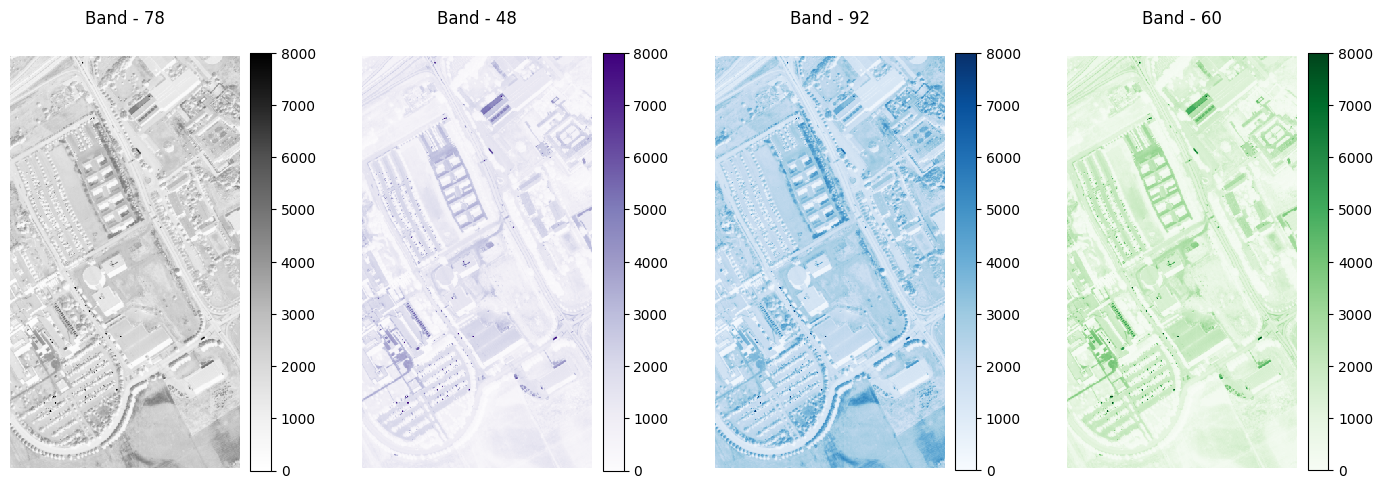

In [237]:
df = read_dataset(gt=False)
X = np.array(df)
plot_spectral_band(df)

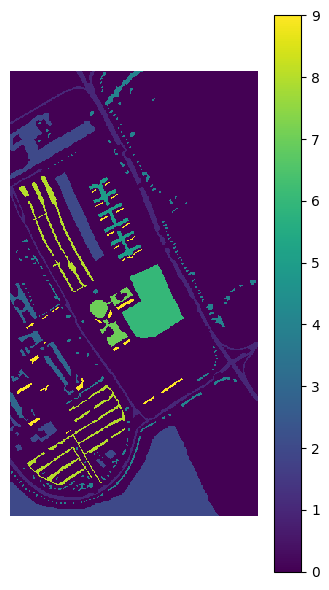

In [238]:
df_gt = read_dataset(gt=True)
plot_gt(df_gt)

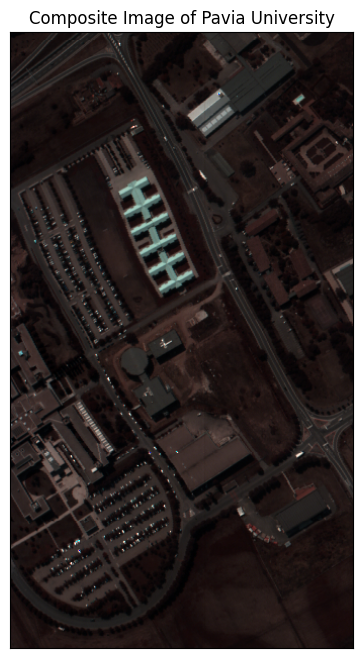

In [239]:
plot_composite(df)

In [240]:
def padWithZeros(X, left_margin=1, right_margin=1, top_margin=1, bottom_margin=1, dim=3):
    if dim == 3:
        newX = np.zeros((X.shape[0] + left_margin + right_margin, X.shape[1] + top_margin + bottom_margin, X.shape[2]))
        newX[left_margin:X.shape[0] + left_margin, top_margin:X.shape[1] + top_margin, :] = X
    
    elif dim == 2:
        newX = np.zeros((X.shape[0] + left_margin + right_margin, X.shape[1] + top_margin + bottom_margin))
        newX[left_margin:X.shape[0] + left_margin, top_margin:X.shape[1] + top_margin] = X

    else:
        newX = []

    return newX

In [241]:
def patch_data(data, labels, rows_factor=3, cols_factor=3):
    rows, cols, channels = data.shape

    left_margin = ((-rows) % rows_factor) // 2
    right_margin = ((-rows) % rows_factor + 1) // 2
    top_margin = ((-cols) % cols_factor) // 2
    bottom_margin = ((-cols) % cols_factor + 1) // 2

    data = padWithZeros(data, left_margin=left_margin, right_margin=right_margin, top_margin=top_margin, bottom_margin=bottom_margin)
    labels = padWithZeros(labels, left_margin=left_margin, right_margin=right_margin, top_margin=top_margin, bottom_margin=bottom_margin, dim=2)

    new_rows, new_cols, _ = data.shape

    patched_data = np.empty((new_rows // rows_factor, new_cols // cols_factor, rows_factor, cols_factor, channels))
    patched_labels = np.zeros((patched_data.shape[0], patched_data.shape[1]))

    for i in range(new_rows // rows_factor):
        for j in range(new_cols // cols_factor):
            datapoint = data[i*rows_factor: (i+1)*rows_factor, j*cols_factor: (j+1)*cols_factor, :]
            patched_data[i, j] = datapoint
            patched_labels[i, j] = labels[i*rows_factor + rows_factor//2, j*cols_factor + cols_factor//2]

    return patched_data, patched_labels


In [256]:
X_patches, y_patches = patch_data(X.reshape((610,340, 103)), y, rows_factor=3, cols_factor=3)

y_patches = y_patches.flatten()

X_patches = X_patches.reshape(-1, np.prod(X_patches.shape[2:]))
X_patches.shape

(23256, 927)